In [ ]:
# Imports
import kagglehub
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from kagglehub import KaggleDatasetAdapter

In [ ]:
#Load the dataset
df = pd.read_csv("McDonald_s_Reviews.csv", encoding="latin1")
print(df.head())
print("\nShape: ", df.shape)

   reviewer_id  store_name              category  \
0            1  McDonald's  Fast food restaurant   
1            2  McDonald's  Fast food restaurant   
2            3  McDonald's  Fast food restaurant   
3            4  McDonald's  Fast food restaurant   
4            5  McDonald's  Fast food restaurant   

                                       store_address  latitude   longitude  \
0  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
1  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
2  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
3  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
4  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   

  rating_count   review_time  \
0        1,240  3 months ago   
1        1,240    5 days ago   
2        1,240    5 days ago   
3        1,240   a month ago   
4        1,240  2 months ago   

                         

In [ ]:
print("Data Info:")
print(df.info())
print("\nDataset Overview:")
print(df.describe())
print("\nData Columns:")
print(df.columns)
df.columns = df.columns.str.strip()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB
None

Dataset Overview:
        reviewer_id     latitude      longitude
count  33396.000000  32736.000000  32736.000000
mean   16698.500000     34.442546    -90.647033
std     9640.739131      5.344116     16.594844
min        1.000000     25.790295   -121.995421
25%     8349.750000     28

In [ ]:
print("Missing values before handling:")
print(df.isnull().sum())

# Handle missing values numerical columns with median
df['latitude'].fillna(df['latitude'].mean(), inplace=True)
df['longitude'].fillna(df['longitude'].mean(), inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
reviewer_id        0
store_name         0
category           0
store_address      0
latitude         660
longitude        660
rating_count       0
review_time        0
review             0
rating             0
dtype: int64

Missing values after handling:
reviewer_id      0
store_name       0
category         0
store_address    0
latitude         0
longitude        0
rating_count     0
review_time      0
review           0
rating           0
dtype: int64


<ipython-input-5-905feb9dda07>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['latitude'].fillna(df['latitude'].mean(), inplace=True)
<ipython-input-5-905feb9dda07>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

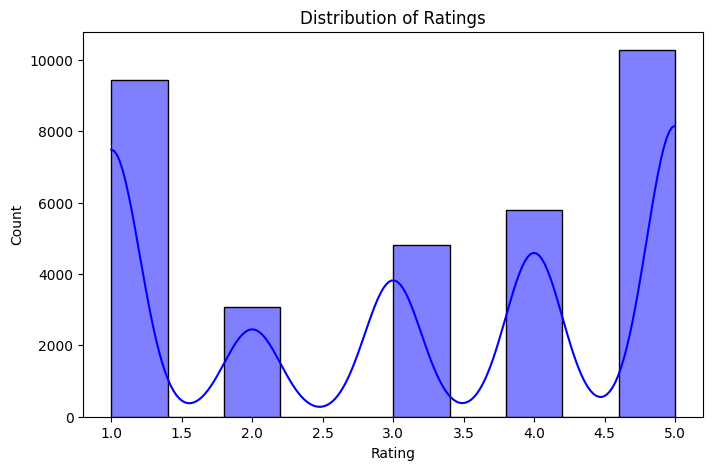

In [ ]:
# 1. Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df["rating"], bins=10, kde=True, color="blue")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

<ipython-input-26-69eebfe5d056>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["category"], order=df["category"].value_counts().index, palette="viridis")


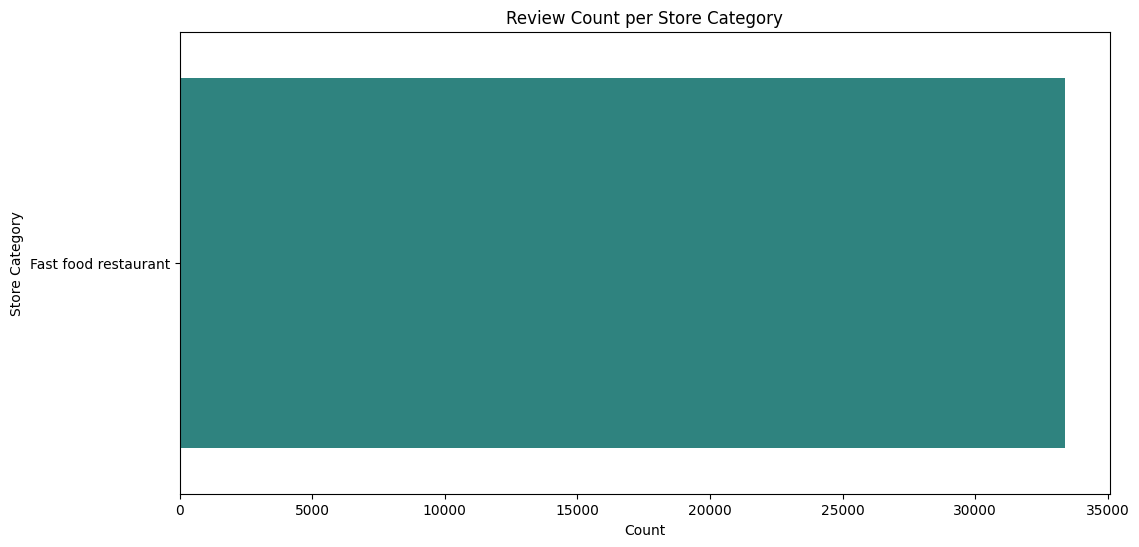

In [ ]:
#  Count of Reviews per Store Category (Bar Chart)
plt.figure(figsize=(12, 6))
sns.countplot(y=df["category"], order=df["category"].value_counts().index, palette="viridis")
plt.title("Review Count per Store Category")
plt.xlabel("Count")
plt.ylabel("Store Category")
plt.show()


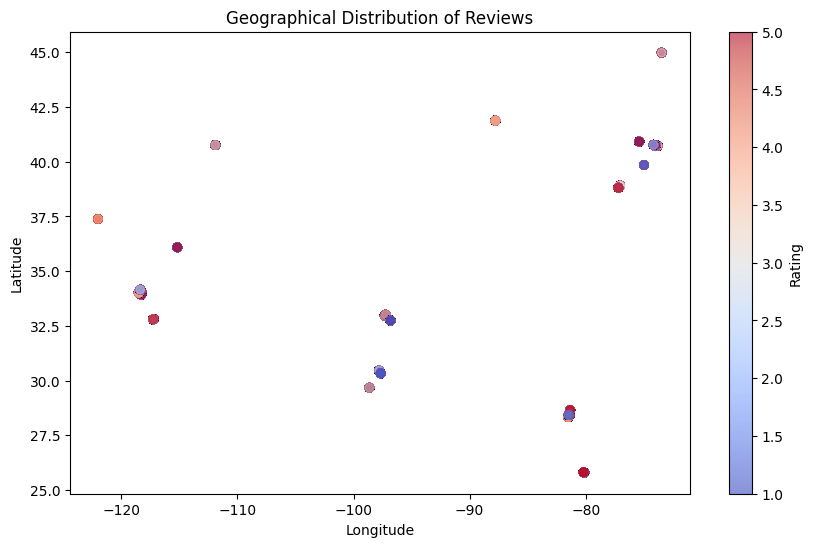

In [ ]:
# Geographical Distribution of Reviews
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

plt.figure(figsize=(10, 6))

# Create scatter plot
scatter = plt.scatter(
    df["longitude"], df["latitude"], c=df["rating"], cmap="coolwarm", alpha=0.6
)

# Add color bar properly
cbar = plt.colorbar(scatter)
cbar.set_label("Rating")

plt.title("Geographical Distribution of Reviews")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

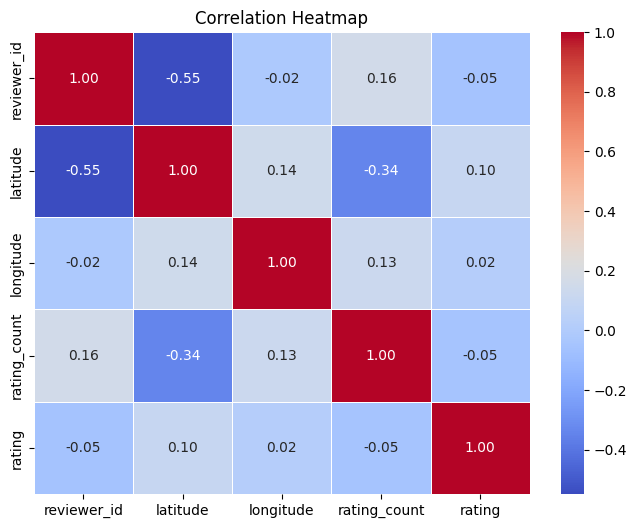

In [ ]:
# Correlation matrix - Convert 'rating' to numeric if it isn't already
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["rating_count"] = pd.to_numeric(df["rating_count"], errors="coerce")

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

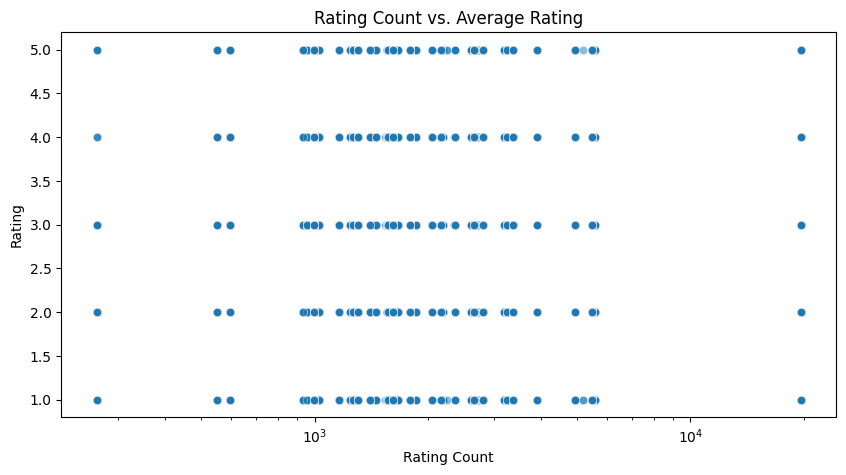

In [ ]:
# Rating Count vs. Rating
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["rating_count"], y=df["rating"], alpha=0.5)
plt.title("Rating Count vs. Average Rating")
plt.xlabel("Rating Count")
plt.ylabel("Rating")
plt.xscale("log")  # Log scale for better visualization
plt.show()


<ipython-input-29-010da97b4329>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="rating", y="category", data=df, palette="coolwarm")


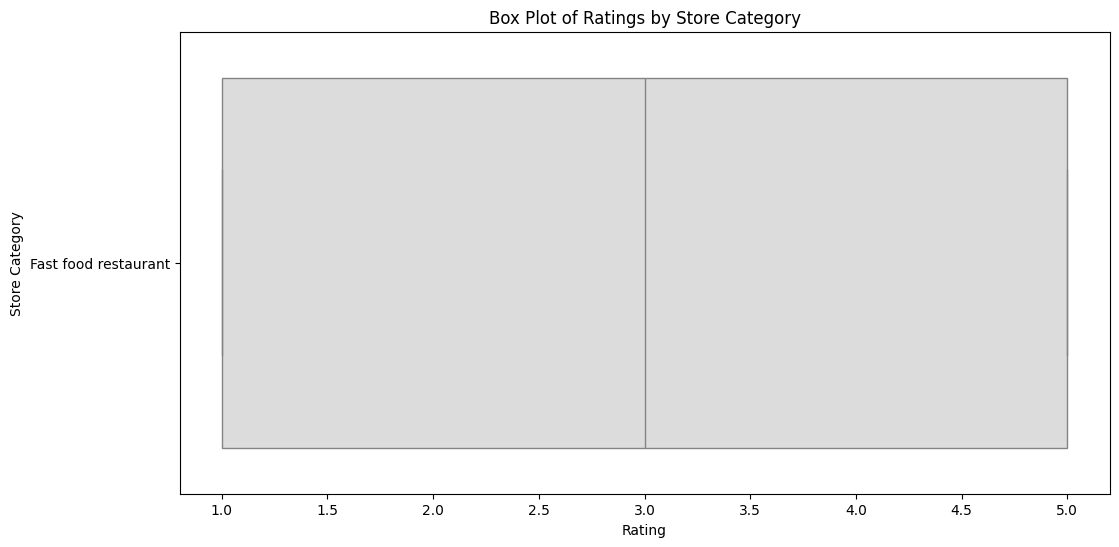

In [ ]:
# Box Plot of Ratings by Store Category
plt.figure(figsize=(12, 6))
sns.boxplot(x="rating", y="category", data=df, palette="coolwarm")
plt.title("Box Plot of Ratings by Store Category")
plt.xlabel("Rating")
plt.ylabel("Store Category")
plt.show()


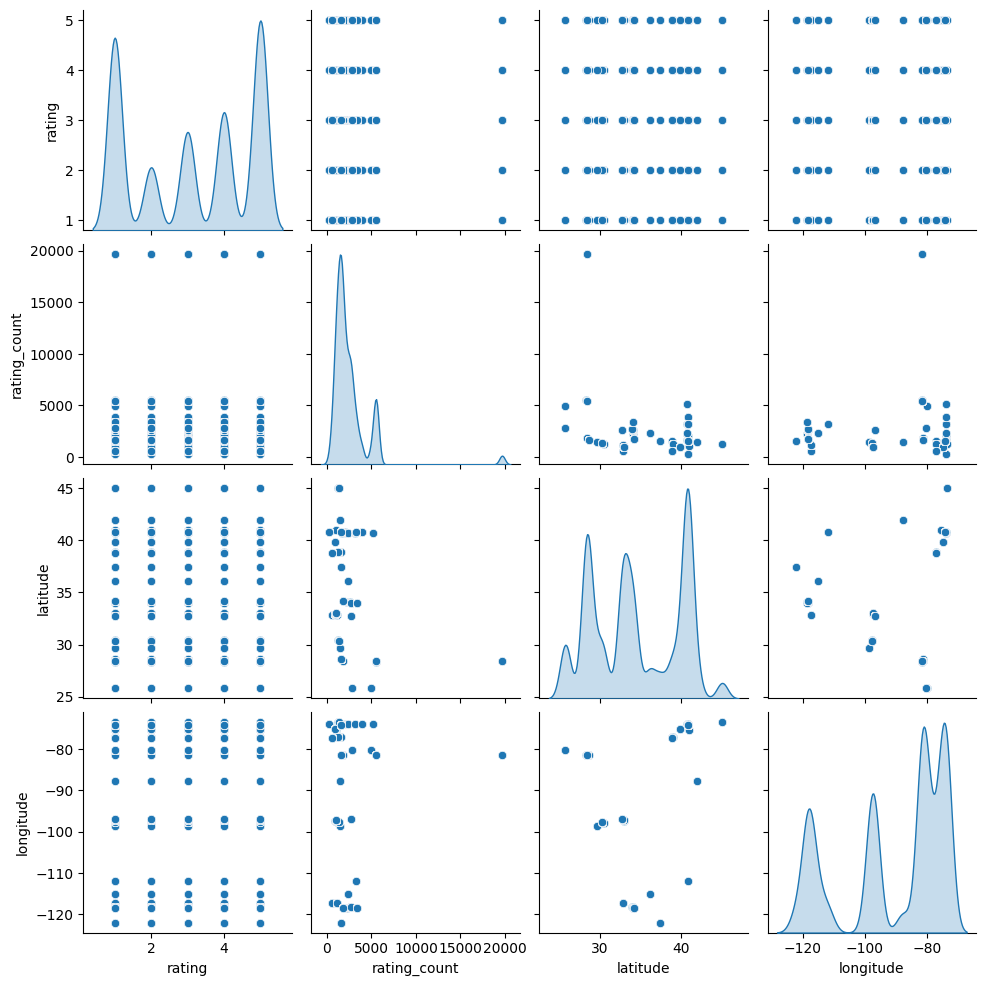

In [ ]:
#  Pairplot for Bivariate Analysis
sns.pairplot(df[["rating", "rating_count", "latitude", "longitude"]], diag_kind="kde")
plt.show()


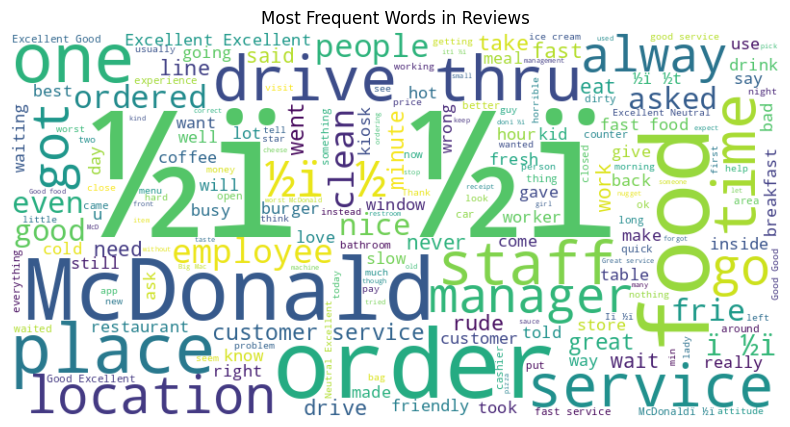

In [ ]:
# Word Cloud for Most Frequent Words in Reviews
from wordcloud import WordCloud

text = " ".join(df["review"].dropna())  # Combine all reviews into one string
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Most Frequent Words in Reviews")
plt.show()



<ipython-input-37-9756cd7e857e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette="coolwarm")


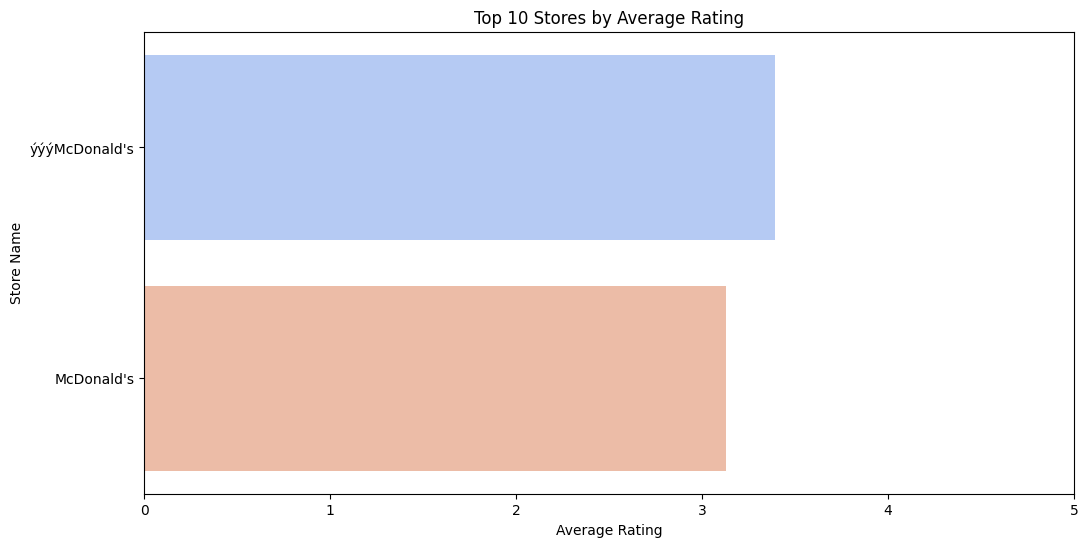

In [ ]:
# Average Rating per Store (Bar Chart)
avg_ratings = df.groupby("store_name")["rating"].mean().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette="coolwarm")
plt.xlabel("Average Rating")
plt.ylabel("Store Name")
plt.title("Top 10 Stores by Average Rating")
plt.xlim(0, 5)  # Ratings are usually between 0 and 5
plt.show()


<ipython-input-38-d573c04df25a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="category", y="rating", data=df, palette="coolwarm", inner="quartile")


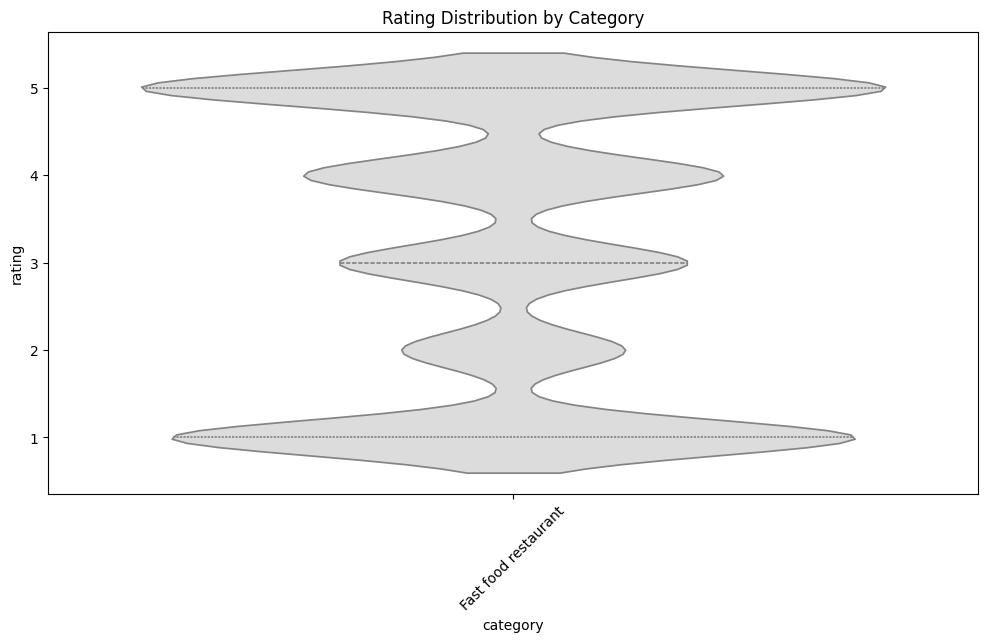

In [ ]:
# Ratings Distribution Per Category (Violin Plot)
plt.figure(figsize=(12, 6))
sns.violinplot(x="category", y="rating", data=df, palette="coolwarm", inner="quartile")
plt.xticks(rotation=45)
plt.title("Rating Distribution by Category")
plt.show()


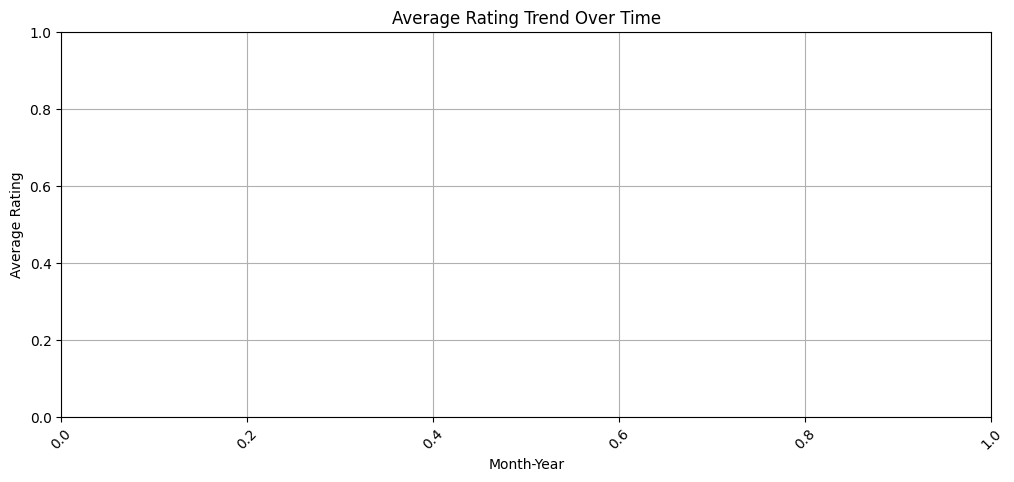

In [ ]:
#  Monthly Rating Trends (Line Plot)
monthly_avg_ratings = df.groupby(df["review_time"].dt.to_period("M"))["rating"].mean()

plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_avg_ratings.index.astype(str), y=monthly_avg_ratings.values, marker="o")
plt.xticks(rotation=45)
plt.xlabel("Month-Year")
plt.ylabel("Average Rating")
plt.title("Average Rating Trend Over Time")
plt.grid()
plt.show()


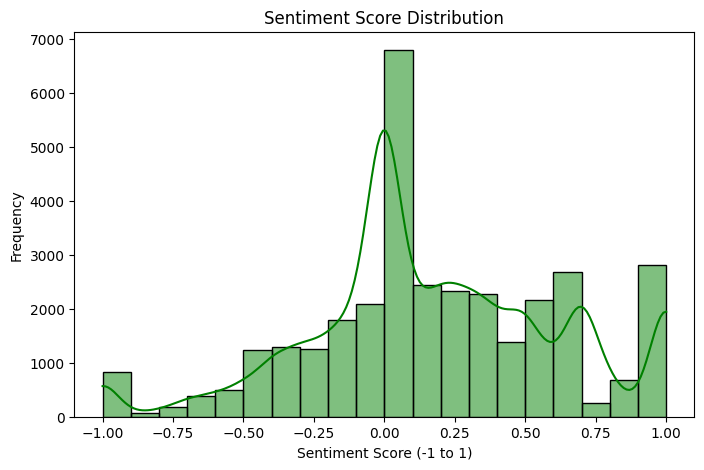

In [ ]:
# Review Sentiment Analysis (Basic)
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

df["sentiment"] = df["review"].apply(get_sentiment)

plt.figure(figsize=(8, 5))
sns.histplot(df["sentiment"], bins=20, kde=True, color="green")
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score (-1 to 1)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Removing unnecessary features
df = df.drop("reviewer_id", axis=1)
df = df.drop("store_name", axis=1)
df = df.drop("category", axis=1)
df.head()

,store_address,latitude,longitude,rating_count,review_time,review,rating
0,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [ ]:
# Encode rating column
df['rating'] = df['rating'].astype(str).str.extract(r'(\d)').astype(int)
df['rating'] = df['rating'].map(lambda x: -1 if x <= 2 else (0 if x == 3 else 1))
df.head()

,store_address,latitude,longitude,rating_count,review_time,review,rating
0,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,-1
1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,1
2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,-1
3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,1
4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",-1


In [ ]:
#Encode rating_count
df['rating_count'] = df['rating_count'].str.replace(',', '').astype(int)
df.head()

,store_address,latitude,longitude,rating_count,review_time,review,rating
0,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,3 months ago,Why does it look like someone spit on my food?...,-1
1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,5 days ago,It'd McDonalds. It is what it is as far as the...,1
2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,5 days ago,Made a mobile order got to the speaker and che...,-1
3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,1
4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,1240,2 months ago,"I repeat my order 3 times in the drive thru, a...",-1


In [ ]:
#Encode store_address
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['store_address'] = le.fit_transform(df['store_address'])
df.head()

,store_address,latitude,longitude,rating_count,review_time,review,rating
0,8,30.460718,-97.792874,1240,3 months ago,Why does it look like someone spit on my food?...,-1
1,8,30.460718,-97.792874,1240,5 days ago,It'd McDonalds. It is what it is as far as the...,1
2,8,30.460718,-97.792874,1240,5 days ago,Made a mobile order got to the speaker and che...,-1
3,8,30.460718,-97.792874,1240,a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,1
4,8,30.460718,-97.792874,1240,2 months ago,"I repeat my order 3 times in the drive thru, a...",-1


In [ ]:
#Encode review_time
import re

def convert_review_time(time_str):
    if pd.isna(time_str):  # Handle missing values
        return None

    match = re.search(r'\d+', str(time_str))  # Ensure it's a string
    if not match:
        return None  # If no number is found, return None

    num = int(match.group())  # Extract number

    if "day" in time_str:
        return num
    elif "month" in time_str:
        return num * 30
    elif "year" in time_str:
        return num * 365
    else:
        return None  # Catch unexpected cases

df['review_time'] = df['review_time'].apply(convert_review_time)
df.head()


,store_address,latitude,longitude,rating_count,review_time,review,rating
0,8,30.460718,-97.792874,1240,90.0,Why does it look like someone spit on my food?...,-1
1,8,30.460718,-97.792874,1240,5.0,It'd McDonalds. It is what it is as far as the...,1
2,8,30.460718,-97.792874,1240,5.0,Made a mobile order got to the speaker and che...,-1
3,8,30.460718,-97.792874,1240,NaN,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,1
4,8,30.460718,-97.792874,1240,60.0,"I repeat my order 3 times in the drive thru, a...",-1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)  # Limit to 100 features

# Transform the text column
tfidf_matrix = vectorizer.fit_transform(df['review'].fillna(""))  # Convert NaN to empty strings

# Convert sparse matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Merge with original dataset (drop original review column)
df = pd.concat([df.drop(columns=['review']), tfidf_df], axis=1)
df.head()

,store_address,latitude,longitude,rating_count,review_time,rating,10,20,area,ask,...,waiting,want,way,went,window,work,worst,wrong,½s,½ï
0,8,30.460718,-97.792874,1240,90.0,-1,0.0,0.0,0.0,0.0,...,0.0,0.527387,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,8,30.460718,-97.792874,1240,5.0,1,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,8,30.460718,-97.792874,1240,5.0,-1,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.048056,0.0,0.053121,0.0,0.000000,0.0,0.986156
3,8,30.460718,-97.792874,1240,NaN,1,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.997586
4,8,30.460718,-97.792874,1240,60.0,-1,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.283198,0.0,0.263631,0.0,0.000000


In [ ]:
# Removes review column and adds these columns
tfidf_df.columns

Index(['10', '20', 'area', 'ask', 'asked', 'bad', 'best', 'better', 'big',
       'breakfast', 'burger', 'busy', 'came', 'chicken', 'clean', 'coffee',
       'cold', 'come', 'customer', 'customers', 'day', 'did', 'didn', 'dirty',
       'don', 'drive', 'eat', 'employees', 'excellent', 'experience', 'fast',
       'food', 'fresh', 'friendly', 'fries', 'gave', 'going', 'good', 'got',
       'great', 'homeless', 'horrible', 'hot', 'ice', 'inside', 'just', 'kids',
       'know', 'like', 'line', 'location', 'long', 'lot', 'love', 'make',
       'manager', 'mcdonald', 'mcdonalds', 'meal', 'minutes', 'need',
       'neutral', 'new', 'nice', 'night', 'open', 'order', 'ordered', 'orders',
       'people', 'place', 'poor', 'quick', 'really', 'restaurant', 'right',
       'rude', 'said', 'say', 'service', 'slow', 'staff', 'terrible', 'time',
       'times', 'told', 'took', 've', 'wait', 'waited', 'waiting', 'want',
       'way', 'went', 'window', 'work', 'worst', 'wrong', '½s', '½ï'],
      dtype

In [ ]:
# Drop columns that are completely empty
X = df.drop(columns=['rating'])
X = X.dropna(axis=1, how='all')  # Drop columns where all values are NaN

# Apply imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame
df_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# SelectKBest for feature selection
selector = SelectKBest(score_func=f_classif, k=99)
X_selected = selector.fit_transform(df_imputed, df['rating'])
selected_features = X.columns[selector.get_support()]

# Convert selected features into DataFrame
df_selected = pd.DataFrame(X_selected, columns=selected_features)

print(selected_features)


Index(['store_address', 'latitude', 'longitude', 'rating_count', 'review_time',
       '10', '20', 'area', 'ask', 'asked', 'bad', 'best', 'better',
       'breakfast', 'burger', 'busy', 'came', 'chicken', 'clean', 'cold',
       'come', 'customer', 'customers', 'day', 'did', 'didn', 'dirty', 'don',
       'drive', 'eat', 'employees', 'excellent', 'experience', 'fast', 'food',
       'fresh', 'friendly', 'fries', 'gave', 'going', 'good', 'got', 'great',
       'homeless', 'horrible', 'hot', 'ice', 'inside', 'just', 'kids', 'know',
       'like', 'line', 'location', 'long', 'lot', 'love', 'make', 'manager',
       'mcdonald', 'meal', 'minutes', 'need', 'neutral', 'nice', 'night',
       'open', 'order', 'ordered', 'orders', 'people', 'place', 'poor',
       'quick', 'right', 'rude', 'said', 'say', 'service', 'slow', 'staff',
       'terrible', 'time', 'times', 'told', 'took', 've', 'wait', 'waited',
       'waiting', 'want', 'way', 'went', 'window', 'work', 'worst', 'wrong',
       '½s',

In [ ]:
# Define feature matrix (X) and target variable (y)
X = df_selected  # Features from previous feature selection step
y = df['rating']  # Target variable

# Apply RandomOverSampler to balance dataset
oversampler = RandomOverSampler(random_state=42)
X_balanced, y_balanced = oversampler.fit_resample(X, y)

# Convert back to DataFrame
df_balanced = pd.DataFrame(X_balanced, columns=X.columns)
df_balanced['rating'] = y_balanced  # Add the target column back

print(df_balanced['rating'].value_counts())  # Check class distribution


rating
-1    16061
 1    16061
 0    16061
Name: count, dtype: int64


In [ ]:
# Split the Data
X = df_selected
y = df['rating']
X_train, X_temp, y_train, y_temp = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Re-apply imputation AFTER splitting
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Train set: (33728, 99), (33728,)
Validation set: (7227, 99), (7227,)
Test set: (7228, 99), (7228,)


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.8648312119535141



🔹 Classification Report:
               precision    recall  f1-score   support

          -1       0.86      0.87      0.86      2388
           0       0.86      0.93      0.89      2464
           1       0.88      0.80      0.83      2376

    accuracy                           0.86      7228
   macro avg       0.87      0.86      0.86      7228
weighted avg       0.87      0.86      0.86      7228

✅ Accuracy: 0.8648
✅ Precision: 0.8654
✅ Recall: 0.8648
✅ F1-score: 0.8640
✅ MCC: 0.7981
✅ Cohen's Kappa: 0.7971
✅ ROC-AUC Score: 0.9628


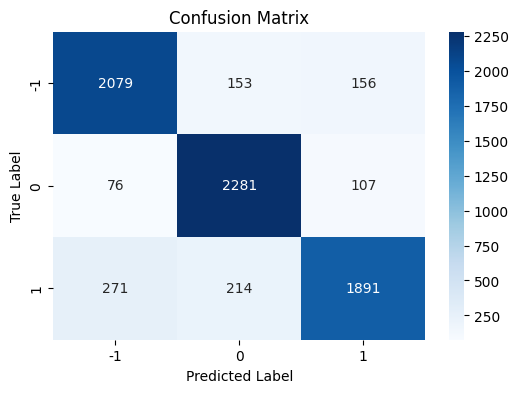

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    roc_auc_score, matthews_corrcoef, cohen_kappa_score, classification_report
)
from sklearn.preprocessing import label_binarize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test, y_pred)
cohen_kappa = cohen_kappa_score(y_test, y_pred)

# 2️⃣ Multi-class ROC-AUC Score (Fixed)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Convert to one-hot encoding
roc_auc = roc_auc_score(y_test_bin, rf_model.predict_proba(X_test), multi_class="ovr")

# 3️⃣ Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# 4️⃣ Print Metrics
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-score: {f1:.4f}")
print(f"✅ MCC: {mcc:.4f}")
print(f"✅ Cohen's Kappa: {cohen_kappa:.4f}")
print(f"✅ ROC-AUC Score: {roc_auc:.4f}")

# 5️⃣ Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


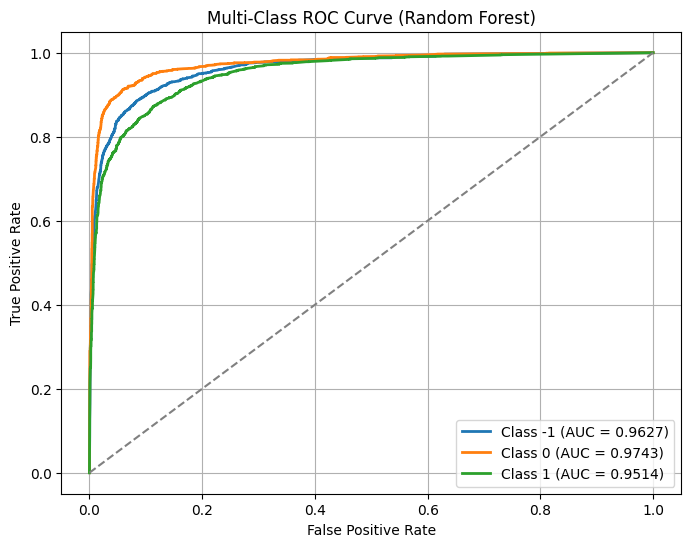

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

# Binarize the output labels
import numpy as np
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Predict probabilities for all classes
y_prob = rf_model.predict_proba(X_test)

# Compute ROC AUC score (One-vs-Rest approach)
roc_auc = roc_auc_score(y_test_bin, y_prob, average="macro", multi_class="ovr")

# Plot ROC Curve for each class
plt.figure(figsize=(8,6))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {np.unique(y_test)[i]} (AUC = {auc(fpr, tpr):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve (Random Forest)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=10000, random_state=42)
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.6772274488101826


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = logreg_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Logistic Regression Precision: {precision:.4f}")

mcc = matthews_corrcoef(y_test, y_pred)
print(f"Logistic Regression MCC: {mcc:.4f}")

cohen_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Logistic Regression Kappa score: {cohen_kappa:.4f}")

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 0.6772
Logistic Regression Precision: 0.6791
Logistic Regression MCC: 0.5171
Logistic Regression Kappa score: 0.5158

Classification Report:
              precision    recall  f1-score   support

          -1       0.68      0.77      0.72      2388
           0       0.60      0.58      0.59      2464
           1       0.76      0.68      0.72      2376

    accuracy                           0.68      7228
   macro avg       0.68      0.68      0.68      7228
weighted avg       0.68      0.68      0.68      7228


Confusion Matrix:
[[1841  450   97]
 [ 605 1439  420]
 [ 269  492 1615]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy}")

KNN Accuracy: 0.6357221914775871


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = knn_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"KNN Precision: {precision:.4f}")

mcc = matthews_corrcoef(y_test, y_pred)
print(f"KNN MCC: {mcc:.4f}")

cohen_kappa = cohen_kappa_score(y_test, y_pred)
print(f"KNN Kappa score: {cohen_kappa:.4f}")

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


KNN Accuracy: 0.6357
KNN Precision: 0.6432
KNN MCC: 0.4586
KNN Kappa score: 0.4525

Classification Report:
              precision    recall  f1-score   support

          -1       0.66      0.58      0.62      2388
           0       0.60      0.79      0.68      2464
           1       0.67      0.54      0.60      2376

    accuracy                           0.64      7228
   macro avg       0.64      0.63      0.63      7228
weighted avg       0.64      0.64      0.63      7228


Confusion Matrix:
[[1386  624  378]
 [ 285 1937  242]
 [ 427  677 1272]]


In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy}")

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
y_pred_val = nb_model.predict(X_val)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Naive Bayes Precision: {precision:.4f}")

mcc = matthews_corrcoef(y_test, y_pred)
print(f"Naive Bayes MCC: {mcc:.4f}")

cohen_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Naive Bayes Kappa score: {cohen_kappa:.4f}")

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Naive Bayes Accuracy: 0.6341
Naive Bayes Precision: 0.6523
Naive Bayes MCC: 0.4665
Naive Bayes Kappa score: 0.4522

Classification Report:
              precision    recall  f1-score   support

          -1       0.71      0.60      0.65      2388
           0       0.67      0.46      0.54      2464
           1       0.57      0.85      0.68      2376

    accuracy                           0.63      7228
   macro avg       0.65      0.64      0.63      7228
weighted avg       0.65      0.63      0.63      7228


Confusion Matrix:
[[1430  334  624]
 [ 445 1128  891]
 [ 137  214 2025]]


In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
y_pred_val = nb_model.predict(X_val)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"BernoulliNB Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"BernoulliNB Precision: {precision:.4f}")

mcc = matthews_corrcoef(y_test, y_pred)
print(f"BernoulliNB MCC: {mcc:.4f}")

cohen_kappa = cohen_kappa_score(y_test, y_pred)
print(f"BernoulliNB Kappa score: {cohen_kappa:.4f}")

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

BernoulliNB Accuracy: 0.6543
BernoulliNB Precision: 0.6542
BernoulliNB MCC: 0.4857
BernoulliNB Kappa score: 0.4819

Classification Report:
              precision    recall  f1-score   support

          -1       0.70      0.67      0.69      2388
           0       0.62      0.51      0.56      2464
           1       0.64      0.79      0.71      2376

    accuracy                           0.65      7228
   macro avg       0.65      0.66      0.65      7228
weighted avg       0.65      0.65      0.65      7228


Confusion Matrix:
[[1594  488  306]
 [ 457 1250  757]
 [ 211  280 1885]]


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

y_train = np.array(y_train).reshape(-1,)
y_val = np.array(y_val).reshape(-1,)
# Define CNN Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 Sentiment Classes: Negative, Neutral, Positive
])

# Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()
# Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"CNN Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node sequential_1/embedding_1/GatherV2 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 699, in <lambda>

  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 750, in _run_callback

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 824, in inner

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 785, in run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-22-822c13eaf7a9>", line 24, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 57, in train_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/sequential.py", line 213, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 182, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 637, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py", line 140, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/numpy.py", line 5346, in take

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/numpy.py", line 2093, in take

indices[26,3] = 5567 is not in [0, 5000)
	 [[{{node sequential_1/embedding_1/GatherV2}}]] [Op:__inference_multi_step_on_iterator_1752]

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Ensure labels are in correct format (flattened)
y_train = np.array(y_train).reshape(-1,)
y_val = np.array(y_val).reshape(-1,)
y_test = np.array(y_test).reshape(-1,)

# 1. Encode input data (X_train, X_val, X_test) to integer indices.
encoder = LabelEncoder()
# Fit the encoder on all your data to ensure consistent mapping
all_data = np.concatenate([X_train.flatten(), X_val.flatten(), X_test.flatten()])
encoder.fit(all_data)

# Transform the data
X_train_encoded = encoder.transform(X_train.flatten()).reshape(X_train.shape)
X_val_encoded = encoder.transform(X_val.flatten()).reshape(X_val.shape)
X_test_encoded = encoder.transform(X_test.flatten()).reshape(X_test.shape)

# 2. Update the input_dim to reflect the vocabulary size after encoding.
vocabulary_size = len(encoder.classes_) # Update input_dim to match vocabulary size

# ---->Shift labels to start from 0
y_train = y_train + 1
y_val = y_val + 1
y_test = y_test + 1


# Define CNN Model
model = Sequential([
    Embedding(input_dim=vocabulary_size, output_dim=128, input_length=X_train.shape[1]),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y_train)), activation='softmax')
])

# Compile the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Train the Model (Using Encoded Data)
history = model.fit(X_train_encoded, y_train, epochs=10, batch_size=32, validation_data=(X_val_encoded, y_val))

# Predictions
y_pred_probs = model.predict(X_test_encoded)
y_pred = np.argmax(y_pred_probs, axis=1)


y_pred = y_pred -1

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"CNN Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_4               │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 225s 209ms/step - accuracy: 0.4489 - loss: 1.0235 - val_accuracy: 0.6221 - val_loss: 0.7456
Epoch 2/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 275s 221ms/step - accuracy: 0.7352 - loss: 0.5721 - val_accuracy: 0.6694 - val_loss: 0.6800
Epoch 3/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 256s 215ms/step - accuracy: 0.7729 - loss: 0.4617 - val_accuracy: 0.6707 - val_loss: 0.6812
Epoch 4/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 268s 221ms/step - accuracy: 0.7766 - loss: 0.4401 - val_accuracy: 0.6732 - val_loss: 0.6982
Epoch 5/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 253s 213ms/step - accuracy: 0.7792 - loss: 0.4282 - val_accuracy: 0.6593 - val_loss: 0.7182
Epoch 6/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 272s 223ms/step - accuracy: 0.7773 - loss: 0.4267 - val_accuracy: 0.6674 - val_loss: 0.7245
Epoch 7/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 252s 214ms/step - accuracy: 0.7846 - loss: 0.4157 - val_accuracy: 0.6288 - val_loss: 0.7473
Epoch 8/10
1054/1054 ━━━━━━━━━━━━━━━━━━━━ 261s 213ms/step - ac

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_